# Setup
Para ejecutar esta notebook se necesitan las siguientes dependencias:

In [1]:
%pip install pandas
%pip install matplotlib
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Imports
Se importan las librerías necesarias.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

# Primer dataset: Students (csv)
## Carga
Se genera un dataframe a partir de un archivo "Students.csv" ubicado en la carpeta datasets.

In [3]:
df_students = pd.read_csv('../datasets/Students.csv')
df_students.head()

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


## Visualización
Se puede observar que es un dataset muy pequeño.

Se genera un nuevo DataFrame que muestra la calificación promedio por género.

In [4]:
df_students_mark_by_gender = pd.DataFrame(df_students.groupby(["gender"])["mark"].mean()).reset_index()
df_students_mark_by_gender

,gender,mark
0,female,77.529412
1,male,71.944444


Se utiliza ese dataframe para crear un gráfico de barra que ilustre la comparación de calificaciones entre ambos géneros.

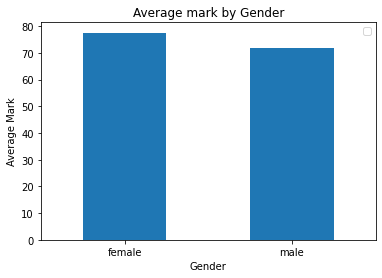

In [5]:
df_students_mark_by_gender.plot(x = "gender", y = "mark", kind="bar")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Average Mark")
plt.title("Average mark by Gender")
plt.legend("")
plt.show()

Se puede observar que en promedio las mujeres tienen ligeramente mejor calificación que los hombres.

Sin dudas hay que tener en cuenta que el dataset es extremadamente pequeño y esto es solo un ejemplo.

# Segundo dataset: Employees (Excel)
## Carga
Se genera un dataframe a partir de la hoja "Data" del archivo Excel "Employees.xlsx" ubicado en la carpeta datasets.

In [6]:
df_employees = pd.read_excel('../datasets/Employees.xlsx', 'Data')
df_employees.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


## Group by
Vamos a calcular la suma total de los salarios anuales agrupados por cargo.

In [7]:
df_salary_by_title = pd.DataFrame(df_employees.groupby(["Job Title"])["Annual Salary"].sum())
df_salary_by_title.sort_values(["Annual Salary"], ascending=False, inplace=True)
df_salary_by_title

,Annual Salary
Job Title,
Vice President,23330493
Director,20767696
Sr. Manger,15517454
Manager,11101017
Sr. Analyst,6048207
Analyst II,3320316
Analyst,2547484
Engineering Manager,2037076
Computer Systems Manager,1687283


Se puede observar que aquellos cargos con mayor salario anual total son el Vice presidente, Director, y Managers, lo cuál tiene sentido.

Cabe destacar que esto no es el promedio, sino la SUMA de los salarios anuales agrupados por cargo.

Este dataframe se enfoca más en visualizar cómo se distribuye a través de los diferentes cargos el capital de la empresa destinado a salarios.

## Melt
Para visualizar mejor un pequeño ejemplo de la función "melt", se obtiene un pequeño subset del DataFrame "employees" (5 empleados) y se transpone el dataframe, haciendo foco en las variables "Job Title" y "Country".

In [8]:
df_employees_subset_melted = pd.melt(df_employees[:5], id_vars=["Full Name"], value_vars=["Job Title", "Country"])
df_employees_subset_melted

,Full Name,variable,value
0,Emily Davis,Job Title,Sr. Manger
1,Theodore Dinh,Job Title,Technical Architect
2,Luna Sanders,Job Title,Director
3,Penelope Jordan,Job Title,Computer Systems Manager
4,Austin Vo,Job Title,Sr. Analyst
5,Emily Davis,Country,United States
6,Theodore Dinh,Country,China
7,Luna Sanders,Country,United States
8,Penelope Jordan,Country,United States
9,Austin Vo,Country,United States
